<h1>Extracting Stock Data of Tesla</h1>

General task is: extract the revenue data for Tesla and build a dashboard to compare the price of the stock vs the revenue. 

## Objectives

*   Find the source of data
*   Choose the instrument for data collecton
*   Collect the data
*   Make the dashboard


<h2>Table of Contents</h2>

<ul>
<li><a href='#q1'>Extracting Tesla Stock Data Using yfinance</a></li>
<li><a href='#q2'>Extracting Tesla Revenue Data Using Webscraping</a></li>
<li><a href='#q3'>Tesla Stock and Revenue Dashboard</a></li>
</ul>

<a id='q1'></a>
<h2>Extracting Tesla Stock Data Using yfinance</h2>

In [20]:
#Install the Yahoo finance libruary
!pip install yfinance==0.1.67 

#Install libruaries for  webscraping
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
#!pip install lxml==4.6.4


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.7.6) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [>                   ] (--:--) No change
pkgs/main/linux-6

In [21]:
#Import Yahoo finance and Pandas
import yfinance as yf
import pandas as pd

#Import libruaries for webscrapping
import requests
from bs4 import BeautifulSoup
print("Done")

Done


<a id='q1'></a>
<h2>Extracting Tesla Stock Data Using yfinance</h2>

Using <b>Ticker</b> function we need to extract data of the stock from Yahoo finance. And create an object <b>tesla</b>. Ticker of the Tesla stock is <b>TSLA</b>.

In [22]:
tesla = yf.Ticker("TSLA") #Get data from Yahoo finance and create an object
print("Done")

Done


Using function <b>history</b> we'll get all availiable history data for Tesla stocks.

In [23]:
tesla_stock_history_data = tesla.history(period="max") #Get history data of the stocks
tesla_stock_history_data.head()    #Show the head of the Dataset. If you see preview of the table it means that stock data extracted successfully

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


When data received we need to visualize the data. I'll use <b>Open</b> price to build the chart.

<AxesSubplot:xlabel='Date'>

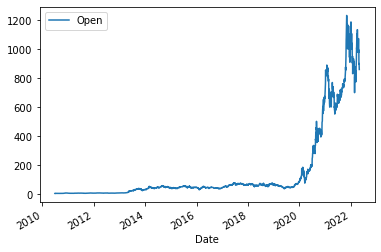

In [24]:
tesla_stock_history_data.reset_index(inplace=True)  #Reset the index of the DataFrame
tesla_stock_history_data.plot(x="Date", y="Open")   #Plot

<a id='q2'></a>
<h2>Extracting Tesla Revenue Data Using Webscraping</h2>

Now we need to extract history data of <b>Revenue</b> for Tesla. I'll be using macrotrends.net website as a source. First we need set <b>url</b> variable.

In [25]:
tesla_revenue_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  #set url

Using <b>requests</b> libruary we'll get all the web page as text and create <b>Beautiful Soup</b> object. 

In [26]:
html_data_for_tesla = requests.get(tesla_revenue_url).text   #get data from the webpage
souped_html_for_tesla = BeautifulSoup(html_data_for_tesla, 'html5lib') #Use beautifulsoup
souped_html_for_tesla.title

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>

Now we need find the right table at the object and build <b>Dataframe</b>. During this step we need to convert data type from <b>srt</b> to <b>float64</b> because revenue data has cymbols <b>$</b> and <b>comma</b>.

In [27]:
tesla_revenue_table = souped_html_for_tesla.find_all('table')[1]   # Find the second table with Quarterly Revenue /or use 0 for first table

tesla_revenue_dataframe = pd.DataFrame(columns=["Date", "Revenue"]) #Create blank dataframe 
 
# Find all tr tags and put data into Dataframe
count_of_missed_rows = 0
for row in tesla_revenue_table.find("tbody").find_all("tr"):  

    col = row.find_all("td") 
    date = col[0].text 
    Revenue = col[1].text
    Revenue = Revenue.replace('$', '').replace(',', '')

    if Revenue.isdigit():
        Revenue = float(Revenue)
        tesla_revenue_dataframe = tesla_revenue_dataframe.append({"Date":date, "Revenue":Revenue}, ignore_index=True)
    else: 
        count_of_missed_rows = count_of_missed_rows + 1
        
print("Missed rows:", count_of_missed_rows) #How many rows were missed

Missed rows: 1


We can see that 1 row was missed because there is no any data. The string was empty. Let's look a the dataframe.

In [28]:
tesla_revenue_dataframe.head() #Let's see the dataframe

,Date,Revenue
0,2022-03-31,18756.0
1,2021-12-31,15339.0
2,2021-09-30,13757.0
3,2021-06-30,11958.0
4,2021-03-31,10389.0


Here we need to change data type of <b>Date</b> column from <b>str</b> to <b>datetime64[ns]</b>. To have the abiliby to plot dataframe.

In [29]:
tesla_revenue_dataframe[["Date"]] = tesla_revenue_dataframe[["Date"]].apply(pd.to_datetime) #Set srt date to datetime64
tesla_revenue_dataframe.dtypes

Date       datetime64[ns]
Revenue           float64
dtype: object

Now we can plot the chart.

<AxesSubplot:xlabel='Date'>

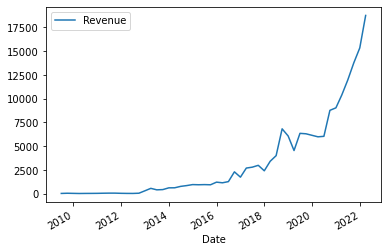

In [30]:
tesla_revenue_dataframe.plot(y="Revenue", x="Date")

Let's go ahead.

<a id='q3'></a>
<h2>Tesla Stock and Revenue Dashboard</h2>

Now we can merge two dataframes. We'll find date values which exist in both dataframes and join rows.

In [36]:
df_tesla_revenue_and_stock_price = tesla_revenue_dataframe.merge(tesla_stock_history_data, how='inner') #Merge df's
df_tesla_revenue_and_stock_price.head()

,Date,Revenue,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-03-31,18756.0,1094.569946,1103.140015,1076.640015,1077.599976,16330900,0,0.0
1,2021-12-31,15339.0,1073.439941,1082.000000,1054.589966,1056.780029,13577900,0,0.0
2,2021-09-30,13757.0,781.000000,789.130005,775.000000,775.479980,17956000,0,0.0
3,2021-06-30,11958.0,679.770020,692.809998,678.140015,679.700012,18924900,0,0.0
4,2021-03-31,10389.0,646.619995,672.000000,641.109985,667.929993,33337300,0,0.0


Let's visualize depency between stock price and revenue

<AxesSubplot:xlabel='Revenue', ylabel='Open'>

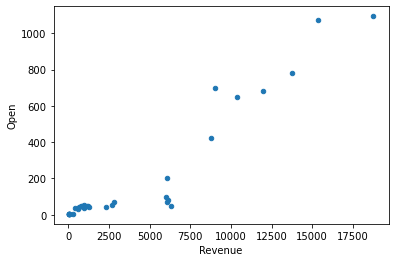

In [32]:
df_tesla_revenue_and_stock_price.plot(x="Revenue", y="Open", kind="scatter") #Plot the result

Here is the result. 

## Author

Timur Talikbayev